<a href="https://colab.research.google.com/github/ShyamSundhar1411/My-ML-Notebooks/blob/master/Computer%20Vision/Introduction_to_Computer_Vision_Using_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Convolutional Neural Network and Computer Vision with Tensorflow
Computer Vision : Practice of writing algorithms which can discover patterns in visual data

## Getting Data

In [45]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2023-01-07 19:15:46--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.24.128, 142.250.4.128, 142.251.10.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.24.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.1’

pizza_steak.zip.1   100%[===================>] 104.47M  15.4MB/s    in 8.3s    

2023-01-07 19:15:56 (12.6 MB/s) - ‘pizza_steak.zip.1’ saved [109540975/109540975]



In [46]:
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

## Inspecting the data

In [47]:
!ls pizza_steak

test  train


In [48]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [49]:
import os

for dirpath,dirnames,filenames in os.walk("pizza_steak"):
  print("There are ",len(dirnames)," directories",len(filenames)," in ",dirpath)

There are  2  directories 0  in  pizza_steak
There are  2  directories 0  in  pizza_steak/train
There are  0  directories 750  in  pizza_steak/train/pizza
There are  0  directories 750  in  pizza_steak/train/steak
There are  2  directories 0  in  pizza_steak/test
There are  0  directories 250  in  pizza_steak/test/pizza
There are  0  directories 250  in  pizza_steak/test/steak


In [50]:
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

## Visualizing Images

In [51]:
import pathlib
import numpy as np
train_data_directory = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in train_data_directory.glob("*")]))

In [52]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [53]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class):
  target_folder = target_dir+"/"+target_class
  random_image = random.sample(os.listdir(target_folder),1)
  print(random_image)
  img = mpimg.imread(target_folder+"/"+random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");
  print(img.shape)
  return img

['282013.jpg']
(512, 382, 3)


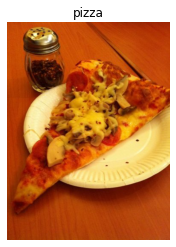

In [54]:
img = view_random_image("pizza_steak/train","pizza")

## End-End CNN Model

In [55]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)


In [56]:
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

In [57]:
train_dir = "/content/pizza_steak/train"
test_dir = "pizza_steak/test"

train_data = train_datagen.flow_from_directory(
    train_dir,batch_size = 32,
    target_size = (224,224),
    class_mode = "binary",
    seed=42
    )
validation_data = valid_datagen.flow_from_directory(
    test_dir,batch_size = 32,
    target_size = (224,224),
    class_mode = "binary",
    seed=42
    )

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [58]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation = "relu",input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation = "relu"),
    tf.keras.layers.Conv2D(10,3,activation = "relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid"),
])
model_1.compile(loss = "binary_crossentropy",optimizer = "adam",metrics = ["accuracy"])

In [59]:
len(train_data)

47

In [60]:
history_1 = model_1.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data = validation_data,
            validation_steps = len(validation_data)
            )

Epoch 1/5
47/47 [==============================] - 24s 515ms/step - loss: 0.5753 - accuracy: 0.6940 - val_loss: 0.3791 - val_accuracy: 0.8360
Epoch 2/5
47/47 [==============================] - 12s 249ms/step - loss: 0.4176 - accuracy: 0.8187 - val_loss: 0.3623 - val_accuracy: 0.8520
Epoch 3/5
47/47 [==============================] - 10s 215ms/step - loss: 0.3732 - accuracy: 0.8400 - val_loss: 0.3497 - val_accuracy: 0.8640
Epoch 4/5
47/47 [==============================] - 10s 212ms/step - loss: 0.3440 - accuracy: 0.8620 - val_loss: 0.2966 - val_accuracy: 0.8660
Epoch 5/5
47/47 [==============================] - 10s 209ms/step - loss: 0.3039 - accuracy: 0.8760 - val_loss: 0.2906 - val_accuracy: 0.8780


In [61]:
model_1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_11 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_13 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                  

## Non-CNN Model for Image Data

In [62]:
tf.random.set_seed(42)

In [63]:
model_2 = tf.keras.Sequential([
    
    tf.keras.layers.Flatten(input_shape = (224,224,3) ),
    tf.keras.layers.Dense(4,activation = "relu"),
    tf.keras.layers.Dense(4,activation = "relu"),
    tf.keras.layers.Dense(1,activation = "sigmoid"),
])
model_2.compile(optimizer= "adam",loss = "binary_crossentropy",metrics = ["accuracy"])
history_2 = model_2.fit(train_data,epochs = 5,steps_per_epoch=len(train_data),validation_data = validation_data,validation_steps=len(validation_data))

Epoch 1/5
47/47 [==============================] - 10s 201ms/step - loss: 1.2089 - accuracy: 0.5040 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 9s 196ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 15s 316ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 10s 210ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 9s 195ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [64]:
model_2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 150528)            0         
                                                                 
 dense_11 (Dense)            (None, 4)                 602116    
                                                                 
 dense_12 (Dense)            (None, 4)                 20        
                                                                 
 dense_13 (Dense)            (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


In [65]:
tf.random.set_seed(42)
model_3 = tf.keras.Sequential([
     tf.keras.layers.Flatten(input_shape = (224,224,3) ),
    tf.keras.layers.Dense(100,activation = "relu"),
    tf.keras.layers.Dense(100,activation = "relu"),
    tf.keras.layers.Dense(100,activation = "relu"),
    tf.keras.layers.Dense(1,activation = "sigmoid")
])
model_3.compile(optimizer= "adam",loss = "binary_crossentropy",metrics = ["accuracy"])
history_3 = model_3.fit(train_data,epochs = 5,steps_per_epoch=len(train_data),validation_data = validation_data,validation_steps=len(validation_data))

Epoch 1/5
47/47 [==============================] - 10s 203ms/step - loss: 4.4058 - accuracy: 0.6100 - val_loss: 0.7477 - val_accuracy: 0.7500
Epoch 2/5
47/47 [==============================] - 9s 197ms/step - loss: 0.7698 - accuracy: 0.7027 - val_loss: 0.6485 - val_accuracy: 0.7260
Epoch 3/5
47/47 [==============================] - 9s 197ms/step - loss: 1.0165 - accuracy: 0.6733 - val_loss: 0.7377 - val_accuracy: 0.7120
Epoch 4/5
47/47 [==============================] - 9s 199ms/step - loss: 0.6134 - accuracy: 0.7353 - val_loss: 0.4695 - val_accuracy: 0.7960
Epoch 5/5
47/47 [==============================] - 9s 200ms/step - loss: 0.4785 - accuracy: 0.7940 - val_loss: 0.4485 - val_accuracy: 0.7820


## Breaking CNN

### 1. Become one with data

['2707522.jpg']
(512, 512, 3)
['2365046.jpg']
(512, 512, 3)


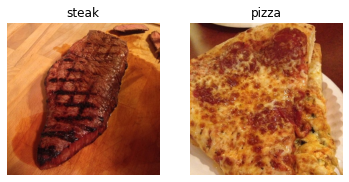

In [66]:
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train","steak")
plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train","pizza")

### 2. Preprocessing Data

In [67]:
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

In [68]:
## Create train and test data generates and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

In [69]:
train_data = train_datagen.flow_from_directory(directory=train_dir,target_size = (224,224),class_mode = "binary",batch_size = 32)
test_data = test_datagen.flow_from_directory(directory=test_dir,target_size = (224,224),class_mode = "binary",batch_size = 32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [70]:
images,labels = train_data.next()
len(images),len(labels)

(32, 32)

In [71]:
len(train_data)

47

In [72]:
images[:2],images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

### 3. Baseline Model

In [89]:
model_4 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(
        filters = 10,
        kernel_size = 3,
        activation = "relu",
        input_shape = (224,224,3),
        padding = "valid",
        strides = (1,1)
        ),
    tf.keras.layers.Conv2D(10,3,activation = "relu"),
    tf.keras.layers.Conv2D(10,3,activation = "relu"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation = "sigmoid"),
])
model_4.compile(loss = "binary_crossentropy",optimizer = "adam",metrics = ["accuracy"])

In [90]:
len(train_data),len(test_data)

(47, 16)

In [91]:
history_4 = model_4.fit(train_data,epochs = 5,steps_per_epoch = len(train_data),validation_data = test_data,validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 11s 217ms/step - loss: 1.7327 - accuracy: 0.6440 - val_loss: 0.5637 - val_accuracy: 0.7180
Epoch 2/5
47/47 [==============================] - 10s 212ms/step - loss: 0.5107 - accuracy: 0.7720 - val_loss: 0.4580 - val_accuracy: 0.7940
Epoch 3/5
47/47 [==============================] - 10s 212ms/step - loss: 0.4186 - accuracy: 0.8273 - val_loss: 0.4651 - val_accuracy: 0.7840
Epoch 4/5
47/47 [==============================] - 10s 212ms/step - loss: 0.3516 - accuracy: 0.8507 - val_loss: 0.4352 - val_accuracy: 0.7800
Epoch 5/5
47/47 [==============================] - 10s 212ms/step - loss: 0.2846 - accuracy: 0.8853 - val_loss: 0.3710 - val_accuracy: 0.8400


In [96]:
def plot_loss_curves(history):
  loss = history.history["loss"]
  accuracy = history.history["accuracy"]
  val_loss = history.history["val_loss"]
  val_accuracy = history.history["val_accuracy"]
  epochs = range(len(history.history["loss"]))
  #Plot Loss
  plt.plot(epochs,loss,label = "training_loss")
  plt.plot(epochs,val_loss,label="val_loss")
  plt.title("Loss")
  plt.xlabel("epochs")
  plt.legend()

  #Plot Accuracy
  plt.figure()
  plt.plot(epochs,accuracy,label = "training_accuracy")
  plt.plot(epochs,val_accuracy,label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()


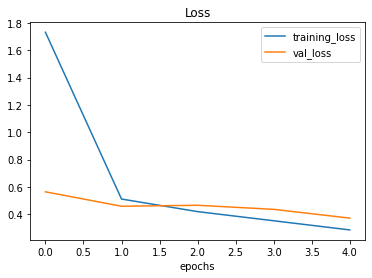

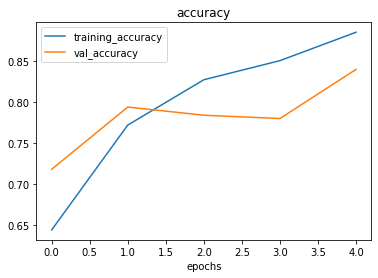

In [97]:
plot_loss_curves(history_4)

### 4. Reducing overfitting using MaxPool2D


In [99]:
model_5 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10,3,activation = "relu",input_shape = (224,224,3)),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(10,3,activation = "relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(10,3,activation = "relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation = "sigmoid")
])
model_5.compile(loss = "binary_crossentropy",optimizer = "adam",metrics = ["accuracy"])

In [100]:
history_5 = model_5.fit(train_data,epochs = 5,steps_per_epoch = len(train_data),validation_data = test_data,validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 206ms/step - loss: 0.6152 - accuracy: 0.6760 - val_loss: 0.4634 - val_accuracy: 0.8100
Epoch 2/5
47/47 [==============================] - 9s 200ms/step - loss: 0.4661 - accuracy: 0.7880 - val_loss: 0.4081 - val_accuracy: 0.8200
Epoch 3/5
47/47 [==============================] - 9s 201ms/step - loss: 0.4341 - accuracy: 0.8040 - val_loss: 0.3883 - val_accuracy: 0.8340
Epoch 4/5
47/47 [==============================] - 9s 200ms/step - loss: 0.3993 - accuracy: 0.8247 - val_loss: 0.3163 - val_accuracy: 0.8620
Epoch 5/5
47/47 [==============================] - 9s 202ms/step - loss: 0.3804 - accuracy: 0.8333 - val_loss: 0.3153 - val_accuracy: 0.8840


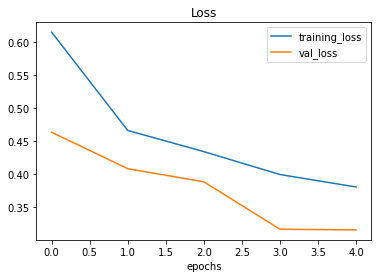

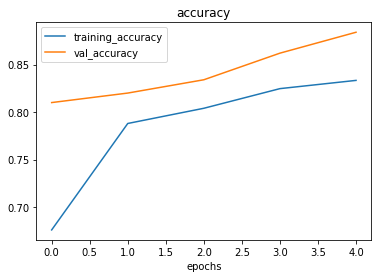

In [101]:
plot_loss_curves(history_5)

### 5. Reducing Overfitting using Data Augmentation

In [106]:
train_datagen_augmented = ImageDataGenerator(
    rescale = 1/255.,rotation_range=0.2,
    shear_range = 0.2,zoom_range = 0.2,width_shift_range = 0.2,height_shift_range=0.3,horizontal_flip=True
    )

In [107]:
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,batch_size = 32,target_size = (224,224),class_mode = "binary",shuffle = False)

Found 1500 images belonging to 2 classes.


In [108]:
images,labels = train_data_augmented.next()

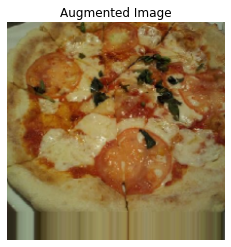

In [109]:
plt.imshow(images[0])
plt.title("Augmented Image")
plt.axis(False);

### 6. Training on Augmented Data

In [111]:
model_6 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(
        filters=10,
        kernel_size = 3,
        strides = (1,1),
        padding = "valid",activation = "relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Conv2D(10,3,activation = "relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Conv2D(10,3,activation = "relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid"),
])
model_6.compile(loss = "binary_crossentropy",optimizer = "adam",metrics = ["accuracy"])

In [112]:
history_6 = model_6.fit(train_data_augmented,epochs = 5,steps_per_epoch = len(train_data_augmented),validation_data = test_data,validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 24s 505ms/step - loss: 0.7381 - accuracy: 0.4720 - val_loss: 0.6909 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 26s 557ms/step - loss: 0.7100 - accuracy: 0.6080 - val_loss: 0.6886 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 24s 503ms/step - loss: 0.6972 - accuracy: 0.5500 - val_loss: 0.6890 - val_accuracy: 0.6480
Epoch 4/5
47/47 [==============================] - 25s 534ms/step - loss: 0.6905 - accuracy: 0.5373 - val_loss: 0.6853 - val_accuracy: 0.6480
Epoch 5/5
47/47 [==============================] - 24s 505ms/step - loss: 0.6865 - accuracy: 0.6320 - val_loss: 0.6722 - val_accuracy: 0.5800


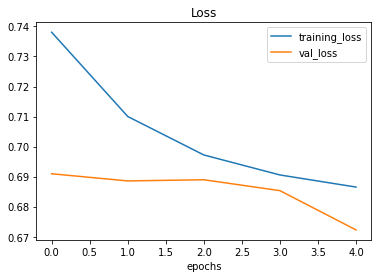

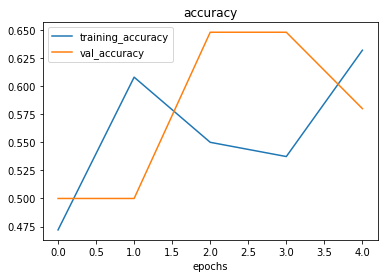

In [113]:
plot_loss_curves(history_6)

### 7. Shuffling Augmented Data

In [115]:
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,batch_size = 32,target_size = (224,224),class_mode = "binary",shuffle = True)

Found 1500 images belonging to 2 classes.


In [117]:
model_7 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(
        filters=10,
        kernel_size = 3,
        strides = (1,1),
        padding = "valid",activation = "relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Conv2D(10,3,activation = "relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Conv2D(10,3,activation = "relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid"),
])
model_7.compile(loss = "binary_crossentropy",optimizer = "adam",metrics = ["accuracy"])

In [118]:
history_7 = model_7.fit(train_data_augmented_shuffled,epochs = 5,steps_per_epoch = len(train_data_augmented_shuffled),validation_data = test_data,validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 24s 507ms/step - loss: 0.6521 - accuracy: 0.6100 - val_loss: 0.5268 - val_accuracy: 0.7080
Epoch 2/5
47/47 [==============================] - 24s 503ms/step - loss: 0.5179 - accuracy: 0.7533 - val_loss: 0.4957 - val_accuracy: 0.7320
Epoch 3/5
47/47 [==============================] - 24s 508ms/step - loss: 0.5041 - accuracy: 0.7573 - val_loss: 0.3504 - val_accuracy: 0.8420
Epoch 4/5
47/47 [==============================] - 23s 494ms/step - loss: 0.4964 - accuracy: 0.7653 - val_loss: 0.5716 - val_accuracy: 0.6940
Epoch 5/5
47/47 [==============================] - 23s 498ms/step - loss: 0.4805 - accuracy: 0.7713 - val_loss: 0.4212 - val_accuracy: 0.7940


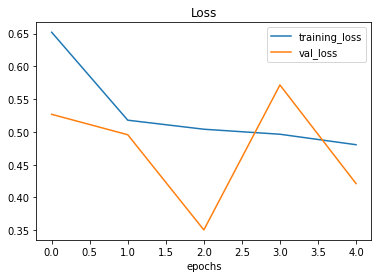

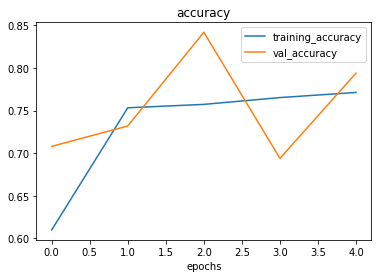

In [119]:
plot_loss_curves(history_7)

In [141]:
model_8 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(
        filters=10,
        kernel_size = 3,
        strides = (1,1),
        padding = "valid",activation = "relu"),
    tf.keras.layers.Conv2D(10,3,activation = "relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Conv2D(10,3,activation = "relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Conv2D(10,3,activation = "relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Conv2D(10,3,activation = "relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid"),
])
model_8.compile(loss = "binary_crossentropy",optimizer = "adam",metrics = ["accuracy"])

In [142]:
history_8 = model_8.fit(train_data_augmented_shuffled,epochs = 7,steps_per_epoch = len(train_data_augmented_shuffled),validation_data = test_data,validation_steps = len(test_data))

Epoch 1/7
47/47 [==============================] - 36s 756ms/step - loss: 0.6921 - accuracy: 0.5593 - val_loss: 0.6629 - val_accuracy: 0.6940
Epoch 2/7
47/47 [==============================] - 24s 510ms/step - loss: 0.5968 - accuracy: 0.6987 - val_loss: 0.3931 - val_accuracy: 0.8160
Epoch 3/7
47/47 [==============================] - 24s 509ms/step - loss: 0.5238 - accuracy: 0.7373 - val_loss: 0.3570 - val_accuracy: 0.8600
Epoch 4/7
47/47 [==============================] - 24s 502ms/step - loss: 0.4834 - accuracy: 0.7753 - val_loss: 0.3522 - val_accuracy: 0.8680
Epoch 5/7
47/47 [==============================] - 35s 741ms/step - loss: 0.4775 - accuracy: 0.7827 - val_loss: 0.3408 - val_accuracy: 0.8620
Epoch 6/7
47/47 [==============================] - 37s 786ms/step - loss: 0.4830 - accuracy: 0.7687 - val_loss: 0.3677 - val_accuracy: 0.8440
Epoch 7/7
47/47 [==============================] - 26s 550ms/step - loss: 0.4907 - accuracy: 0.7733 - val_loss: 0.3166 - val_accuracy: 0.8760


## Making Prediction with trained model

In [124]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

--2023-01-07 20:15:22--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.009s  

2023-01-07 20:15:22 (204 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



In [130]:
def load_and_prep_image(filename,img_shape=224):
  """Reads an image from filename and preprocess it to tensor and reshapes it to (img_shape,img_shape,color channels)"""
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img)
  img = tf.image.resize(img,[img_shape,img_shape])
  img = img/255.
  return img


In [131]:
steak = load_and_prep_image("03-steak.jpeg")

In [152]:
pred = model_8.predict(tf.expand_dims(steak,axis=0))
pred

1/1 [==============================] - 0s 25ms/step


array([[0.79124576]], dtype=float32)

In [144]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [146]:
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [150]:
def pred_and_plot(model,filename,class_names=class_names):
  """Imports an image located at filename, make a prediction with model and plots the image with predicted class as the title"""
  img = load_and_prep_image(filename)
  pred = model.predict(tf.expand_dims(img,axis=0))
  pred_class = class_names[int(tf.round(pred))]

  plt.imshow(img)
  plt.title("Prediction: "+pred_class)
  plt.axis(False);

1/1 [==============================] - 0s 19ms/step


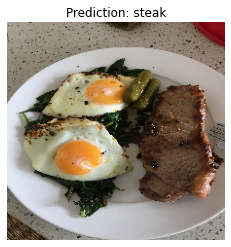

In [151]:
pred_and_plot(model_8,"03-steak.jpeg")

In [153]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg

--2023-01-07 20:40:08--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.01s   

2023-01-07 20:40:10 (203 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]



1/1 [==============================] - 0s 18ms/step


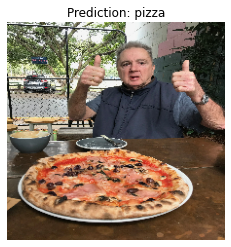

In [154]:
pred_and_plot(model_8,"03-pizza-dad.jpeg")